# MOD 5 FINAL PROJECT - WIP
- James M. Irving, Ph.D.
- 06/20/19

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MOD-5-FINAL-PROJECT---WIP" data-toc-modified-id="MOD-5-FINAL-PROJECT---WIP-1">MOD 5 FINAL PROJECT - WIP</a></span><ul class="toc-item"><li><span><a href="#Plan" data-toc-modified-id="Plan-1.1">Plan</a></span><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1.1.1">Goal</a></span></li><li><span><a href="#Data-to-Analyze" data-toc-modified-id="Data-to-Analyze-1.1.2">Data to Analyze</a></span></li><li><span><a href="#Calculating-&quot;CAPSratio&quot;" data-toc-modified-id="Calculating-&quot;CAPSratio&quot;-1.1.3">Calculating "CAPSratio"</a></span></li></ul></li><li><span><a href="#NLP" data-toc-modified-id="NLP-1.2">NLP</a></span><ul class="toc-item"><li><span><a href="#Removing-Stopwords,-Regexp-Tokenzie" data-toc-modified-id="Removing-Stopwords,-Regexp-Tokenzie-1.2.1">Removing Stopwords, Regexp Tokenzie</a></span></li><li><span><a href="#Identifying-Hashtags,-Mentions,-URLs" data-toc-modified-id="Identifying-Hashtags,-Mentions,-URLs-1.2.2">Identifying Hashtags, Mentions, URLs</a></span></li><li><span><a href="#Generating-Frequency-Distribtuions" data-toc-modified-id="Generating-Frequency-Distribtuions-1.2.3">Generating Frequency Distribtuions</a></span></li><li><span><a href="#Creating-Bigrams-and-PMI-scores" data-toc-modified-id="Creating-Bigrams-and-PMI-scores-1.2.4">Creating Bigrams and PMI scores</a></span></li><li><span><a href="#PMI" data-toc-modified-id="PMI-1.2.5">PMI</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-1.2.6">Sentiment Analysis</a></span></li></ul></li></ul></li></ul></div>

## Plan

### Goal
- Goal is to use President Trump's tweets to predict fluctuations in the stock market.

### Data to Analyze
- All Donal Trump tweets from inaugaration day 2017 to today (for now) - 06/20/19
    - Extracted from http://www.trumptwitterarchive.com/archive
    - Copy and pasted .csv into "../trump_tweets_01202017_06202019.csv"

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = '../trump_tweets_01202017_06202019.csv'
df = pd.read_csv(file, encoding='utf-8')
df.rename(axis=1,mapper={'text':'content','created_at':'date'},inplace=True)
df['date']=pd.to_datetime(df['date'])
df.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Since Election Day 2016 Stocks up almost 50% S...,2019-06-20 00:12:31,16742,64362,False,1141499029727121408
1,Twitter for iPhone,Congratulations to President Lopez Obrador — M...,2019-06-19 23:01:59,20490,87423,False,1141481280653209600
2,Twitter for iPhone,Just returning from Orlando and Doral (Miami) ...,2019-06-19 20:39:28,12693,68118,False,1141445414824136704
3,Twitter for iPhone,I will be interviewed LIVE tonight by @seanhan...,2019-06-19 20:29:24,10586,48786,False,1141442879518322689
4,Twitter for iPhone,....asking Hillary Clinton why she deleted and...,2019-06-19 19:48:04,21712,93137,False,1141432478491717632


In [20]:
print(' First tweet:',df.date.min(),'\n','Last tweet:',df.date.max())
print('\nRange of Dates: ',df.date.max() - df.date.min())

 First tweet: 2017-01-20 12:31:53 
 Last tweet: 2019-06-20 00:12:31

Range of Dates:  880 days 11:40:38


In [21]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Number of variables,7
Number of observations,8442
Total Missing (%),0.1%
Total size in memory,461.8 KiB
Average record size in memory,56.0 B
Numeric,3
Categorical,3
Boolean,0
Date,1
Text (Unique),0
Rejected,0


In [22]:
df.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Since Election Day 2016 Stocks up almost 50% S...,2019-06-20 00:12:31,16742,64362,False,1141499029727121408
1,Twitter for iPhone,Congratulations to President Lopez Obrador — M...,2019-06-19 23:01:59,20490,87423,False,1141481280653209600
2,Twitter for iPhone,Just returning from Orlando and Doral (Miami) ...,2019-06-19 20:39:28,12693,68118,False,1141445414824136704
3,Twitter for iPhone,I will be interviewed LIVE tonight by @seanhan...,2019-06-19 20:29:24,10586,48786,False,1141442879518322689
4,Twitter for iPhone,....asking Hillary Clinton why she deleted and...,2019-06-19 19:48:04,21712,93137,False,1141432478491717632


### Calculating "CAPSratio" 
- \# of uppercase chars/ # of lowercase chars

In [23]:
# test = df['text'][3]
# print(test)

# test_upper = [1 for x in test if x.isupper()]
# test_lower = [1 for x in test if x.islower()]
# test_ratio = sum(test_upper) /sum(test_lower)
# print(f"\t# CAPS/Total Chars = {test_ratio*100:.2f}%")

In [24]:
def case_ratio(msg):
    """Accepts a twitter message (or used with .apply(lambda x:)).
    Returns the ratio of capitalized characters out of the total number of characters."""
    import numpy as np
    msg_length = len(msg)
    test_upper = [1 for x in msg if x.isupper()]
    test_lower = [1 for x in msg if x.islower()]
    test_ratio = np.round(sum(test_upper)/msg_length,5)
    return test_ratio

In [25]:
df['case_ratio'] = df['content'].apply(lambda x: case_ratio(x))
df.sort_values('case_ratio',ascending=False).head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,case_ratio
175,Twitter for iPhone,PRESIDENTIAL HARASSMENT!,2019-06-11 11:51:43,22053,96769,False,1138413497858101249,0.91667
519,Twitter for iPhone,PRESIDENTIAL HARASSMENT!,2019-05-22 10:03:51,25473,108688,False,1131138596109463553,0.91667
1788,Twitter for iPhone,PRESIDENTIAL HARASSMENT!,2019-03-08 12:34:24,18854,84483,False,1103997393073254400,0.91667
1816,Twitter for iPhone,PRESIDENTIAL HARASSMENT!,2019-03-05 14:12:28,27152,115800,False,1102934910900363266,0.91667
1255,Twitter for iPhone,PRESIDENTIAL HARASSMENT!,2019-04-18 12:07:08,30697,145842,False,1118848431932493824,0.91667


## NLP

- [ ] Paste in relevant code from my mod4 project 

### Removing Stopwords, Regexp Tokenzie

In [26]:
# Generate Stopwords List from nltk + punctuation + custom list
from nltk import regexp_tokenize
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

from nltk.corpus import stopwords
import string

stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','...','…','``','co','“','’','‘','”',"n't","''",'u','s',"'s",'|','\\|','amp',"i'm"]
stopwords_list += [0,1,2,3,4,5,6,7,8,9]

## Adding in stopword removal to the actual dataframe
def apply_stopwords(stopwords_list,  text, tokenize=True, pattern = "([a-zA-Z]+(?:'[a-z]+)?)"):

    if tokenize==True:
        from nltk import regexp_tokenize
        
        text = regexp_tokenize(text,pattern)
        
    stopped = [x.lower() for x in text if x.lower() not in stopwords_list]
    return ' '.join(stopped)

In [27]:
# # Remove stopwords using function apply_stopwords)
# df['text_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))

# # Tokenize using regexp_tokenize from nltk
# df['tokens_stopped'] = df['content'].apply(lambda x: regexp_tokenize(x,pattern))

In [28]:
df.head(2)

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,case_ratio
0,Twitter for iPhone,Since Election Day 2016 Stocks up almost 50% S...,2019-06-20 00:12:31,16742,64362,False,1141499029727121408,0.05495
1,Twitter for iPhone,Congratulations to President Lopez Obrador — M...,2019-06-19 23:01:59,20490,87423,False,1141481280653209600,0.08571


### Identifying Hashtags, Mentions, URLs

In [29]:
# # Save 'hashtags' column containing all hastags
# import re

# # Remove `RT @Mentions` FIRST:
# re_RT = re.compile('RT [@]?\w*:')

# # Remove urls with regex
# urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

# # Remove and save Hashtags
# hashtags = re.compile(r'\#\w*')


In [30]:
# Save 'hashtags' column containing all hastags
import re
df['content_raw'] = df['content'].copy()

# Add has_RT and starts_RT columns
# Creating columns for tweets that `has_RT` or `starts_RT`
df['has_RT']=df['content_raw'].str.contains('RT')
df['starts_RT']=df['content_raw'].str.contains('^RT')

## FIRST REMOVE THE RT HEADERS

# Remove `RT @Mentions` FIRST:
re_RT = re.compile('RT [@]?\w*:')

raw_col =  'content_raw'
check_content_col =raw_col
fill_content_col = 'content'

df['content_starts_RT'] = df[check_content_col].apply(lambda x: re_RT.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: re_RT.sub(' ',x))


## SECOND REMOVE URLS
# Remove urls with regex
urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

check_content_col = 'content'
fill_content_col = 'content'

# df_full['content_urls'] = df_full[check_content_col].apply(lambda x: urls.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: urls.sub(' ',x))

## SAVE THIS MINIMALLY CLEANED CONTENT AS 'content_min_clean'
df['content_min_clean'] =  df[fill_content_col]



## REMOVE AND SAVE HASHTAGS, MENTIONS
# Remove and save Hashtags
hashtags = re.compile(r'\#\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_hashtags'] =  df[check_content_col].apply(lambda x: hashtags.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: hashtags.sub(' ',x))


# Remove and save mentions (@)'s
mentions = re.compile(r'\@\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_mentions'] =  df[check_content_col].apply(lambda x: mentions.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: mentions.sub(' ',x))


# Creating content_stopped columns and then tokens_stopped column
df['content_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))
df['tokens_stopped'] = df['content_stopped'].apply(lambda x: regexp_tokenize(x,pattern))

In [78]:
# Issue of empty entries for hashtags interfering with joining.
def empty_lists_to_strings(x):
    """Takes a series and replaces any empty lists with an empty string instead."""
    if len(x)==0:
        return ' '
    else:
        return ' '.join(x) #' '.join(tokens)
    
    
# Apply empty_lists_to_strings to hashtags
df['hashtag_strings'] = df['content_hashtags'].apply(lambda x: empty_lists_to_strings(x))

# Apply empty_lists_to_strings to mentions
df['mention_strings'] = df['content_mentions'].apply(lambda x: empty_lists_to_strings(x))

In [79]:
df.head(2)

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,case_ratio,content_raw,has_RT,starts_RT,content_starts_RT,content_min_clean,content_hashtags,content_mentions,content_stopped,tokens_stopped,hashtag_strings,mention_strings
0,Twitter for iPhone,Since Election Day 2016 Stocks up almost 50% S...,2019-06-20 00:12:31,16742,64362,False,1141499029727121408,0.05495,Since Election Day 2016 Stocks up almost 50% S...,False,False,[],Since Election Day 2016 Stocks up almost 50% S...,[],"[@LouDobbs, @TuckerCarlson, @seanhannity, @Ing...",since election day stocks almost stocks gained...,"[since, election, day, stocks, almost, stocks,...",,@LouDobbs @TuckerCarlson @seanhannity @Ingraha...
1,Twitter for iPhone,Congratulations to President Lopez Obrador — M...,2019-06-19 23:01:59,20490,87423,False,1141481280653209600,0.08571,Congratulations to President Lopez Obrador — M...,False,False,[],Congratulations to President Lopez Obrador — M...,[],[],congratulations president lopez obrador mexico...,"[congratulations, president, lopez, obrador, m...",,


### Generating Frequency Distribtuions

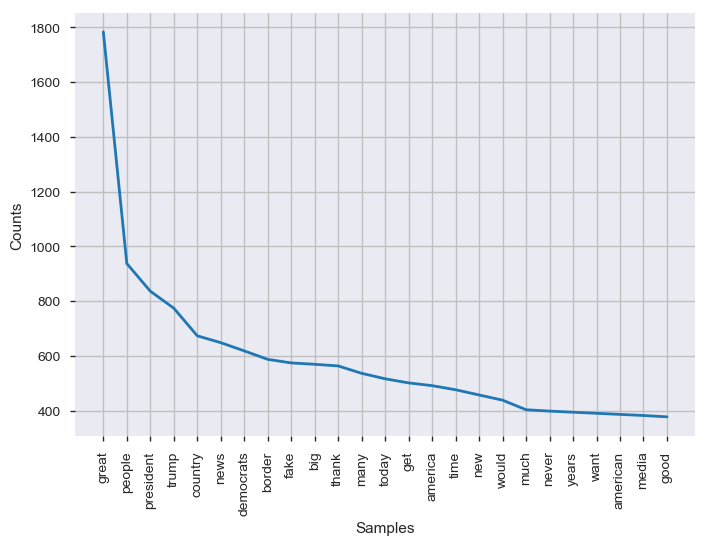

In [100]:
column = 'content_stopped'
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

tweets_combined = df[column]
tweets_combined = ' '.join(tweets_combined)
tweets_tokenized = regexp_tokenize(tweets_combined, pattern)

# CREATING TEXT DICT FOR FREQUENCY DISTRIBUTIONS
TEXT = dict()
TEXT['tokens'] = tweets_tokenized
TEXT['text'] = tweets_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tweets = FreqDist(TEXT['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tweets.plot(25)
    

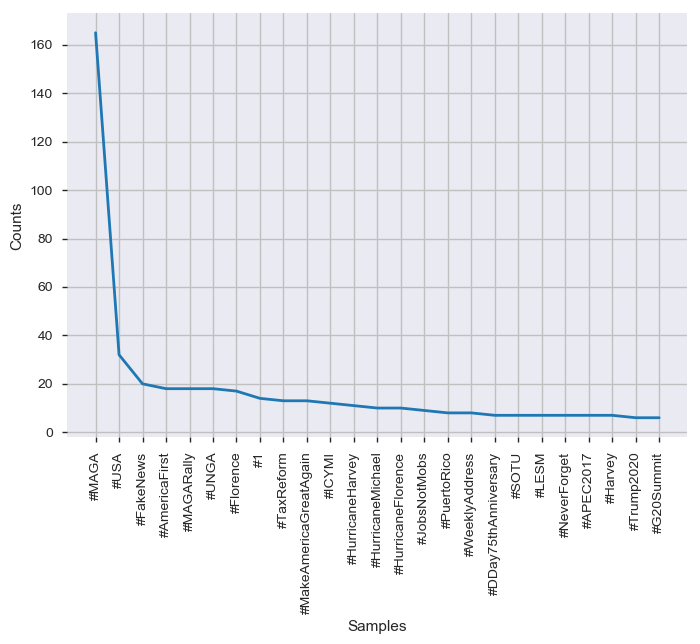

In [101]:
# CREATING HASHTAG DICT
column = 'hashtag_strings'
tag_pattern ='(#\w*)'
tags_combined = df[column]
tags_combined = ' '.join(tags_combined)
tags_tokenized = regexp_tokenize(tags_combined, tag_pattern)

TAGS = dict()
TAGS['tokens'] = tags_tokenized
TAGS['text'] = tags_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tags = FreqDist(TAGS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tags.plot(25)

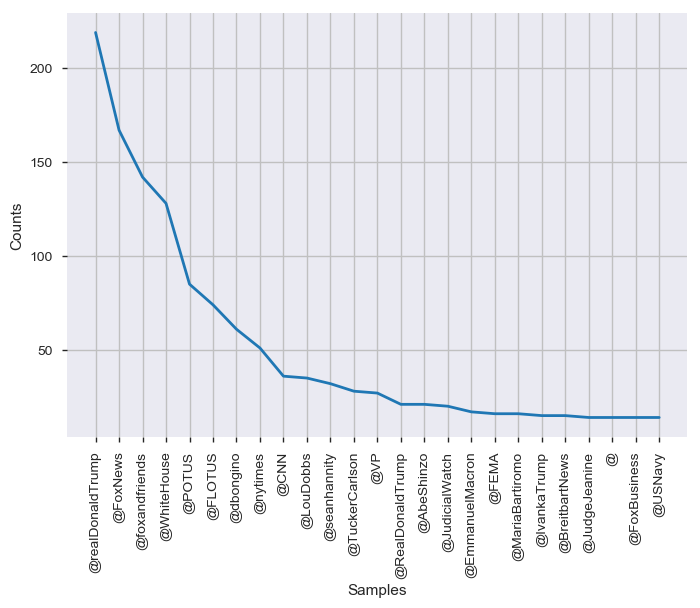

In [106]:
# CREATING METNION DICT
column = 'mention_strings'
at_pattern ='(@\w*)'
ats_combined = df[column]
ats_combined = ' '.join(ats_combined)
ats_tokenized = regexp_tokenize(ats_combined, at_pattern)

ATS = dict()
ATS['tokens'] = ats_tokenized
ATS['text'] = ats_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_ats = FreqDist(ATS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_ats.plot(25)

#### WordClouds

In [68]:
# Import mask images for shaped wordclouds
from PIL import Image

## Twitter Bird masks
mask_f_right = np.array(Image.open('figures/masks/twitter1.png'))
mask_f_left = np.array(Image.open('figures/masks/twitter1flip.png'))

# Hashtag and mentions mask 
mask_at = np.array(Image.open('figures/masks/Hashtags and Ats Masks-04.jpg'))
mask_hashtag = np.array(Image.open('figures/masks/Hashtags and Ats Masks-03.jpg'))

In [111]:
# Define wordcloud plotting function
def plot_fit_cloud(troll_cloud,label1='Most Common Words',figsize=(4,4)):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=figsize)

    ax.imshow(troll_cloud, interpolation='gaussian')
    # ax[0].set_aspect(1.5)
    ax.axis("off")
    ax.set_title(label1, fontsize=20)
    return fig, ax

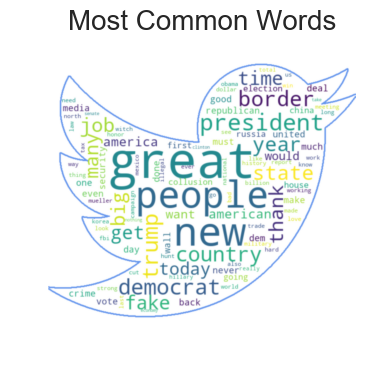

In [118]:
# Instantiazting wordcloud and defining properties
from wordcloud import WordCloud

max_font_size=100
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
# collocations=False

wordcloud = WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=False,
                       mask=mask_f_right, contour_color='cornflowerblue', contour_width=2)

wordcloud.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud)

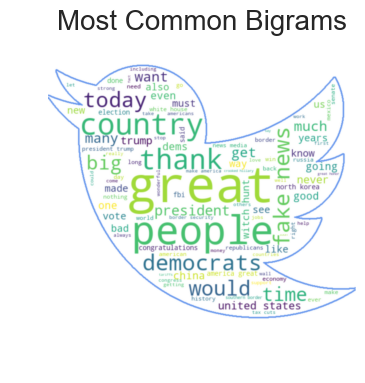

In [123]:
# Plotting bigram wordcloud
wordcloud_bigram= WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words,
                            background_color=background_color, collocations=True,normalize_plurals=False,
                            stopwords=[], mask=mask_f_left, contour_color='cornflowerblue', contour_width=2)
wordcloud_bigram.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud_bigram, 'Most Common Bigrams')

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x212bc150940>)

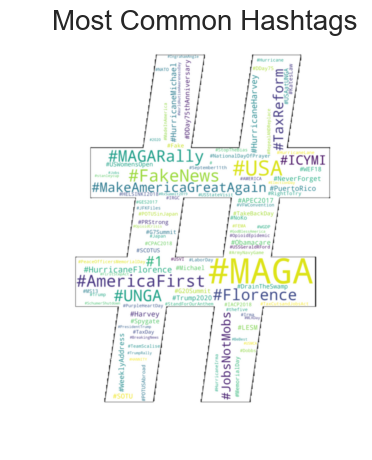

In [113]:
# Combine and Tokenize hashtags
tags = df['hashtag_strings']
tags = ' '.join(tags)
tags_tokens = regexp_tokenize(tags,'(#\w*)')


# WordClouds for Hashtags
max_font_size=300
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(#\w*)'


tag_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height,
                            max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
                            mask=mask_hashtag, contour_color='black', contour_width=2)#, include_numbers=True)


tag_cloud.generate(' '.join(tags_tokens))
plot_fit_cloud(tag_cloud,'Most Common Hashtags',figsize=(5,5))

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x212bc553b00>)

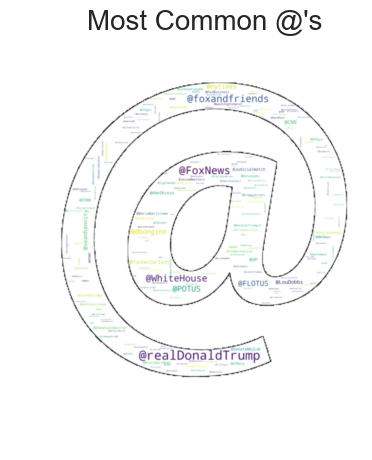

In [115]:
# Combine and Tokenize hashtags
mentions = df['mention_strings']
mentions = ' '.join(mentions)
mentions_tokens = regexp_tokenize(mentions,'(@\w*)')


# WordClouds for Mentions
max_font_size=300
width=500
height=500
max_words=200
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(@\w*)'

mentions_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height,
                            max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
                            mask=mask_at, contour_color='black', contour_width=2)#, include_numbers=True)


mentions_cloud.generate(' '.join(mentions_tokens))

plot_fit_cloud(mentions_cloud,"Most Common @'s",figsize=(5,5))

### Creating Bigrams and PMI scores

In [116]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
import mod4functions_JMI as jmi

bigram_measures =BigramAssocMeasures()

tweet_finder = BigramCollocationFinder.from_words(TEXT['tokens'])
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

df_1 = jmi.quick_table(tweets_scored[:25], col_names =['Bigram','Frequency'],caption='Tweet Bigrams', display_df=False);
df_1

,Bigram,Frequency
0,"(fake, news)",0.003711
1,"(united, states)",0.002457
2,"(witch, hunt)",0.001814
3,"(america, great)",0.001493
4,"(north, korea)",0.001468
5,"(president, trump)",0.001410
6,"(white, house)",0.001385
7,"(news, media)",0.001237
8,"(border, security)",0.001163
9,"(make, america)",0.001105


### PMI

In [ ]:
# troll_pmi_finder = BigramCollocationFinder.from_words(TEXT['trolls']['tokens'])
# troll_pmi_finder.apply_freq_filter(5)

# troll_pmi_scored = troll_pmi_finder.score_ngrams(bigram_measures.pmi)
# troll_pmi_df = pd.DataFrame.from_records(troll_pmi_scored[:20],columns=['Bigrams','PMI Score'])

# # display(troll_pmi_df.style.set_caption('Troll Tweets'))
# sdf1 = troll_pmi_df.set_index('Bigrams').style.set_caption('Troll Tweets')
# # quick_table(troll_pmi_scored)

### Sentiment Analysis

In [129]:
import bs_ds as bs
import mod4functions_JMI as jmi
# from bs_ds.imports import *

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

source_column='content_min_clean'
df['sentiment_scores'] = df[source_column].apply(lambda x: sid.polarity_scores(x))
df['compound_score'] = df['sentiment_scores'].apply(lambda dict: dict['compound'])
df['sentiment_class'] = df['compound_score'].apply(lambda score: 'pos' if score >=0 else 'neg')

In [130]:
# Write a function to extract the group scores from the dataframe
def get_group_sentiment_scores(df, score_col='sentiment_scores'):
    import pandas as pd
    series_df = df[score_col]
    series_neg = series_df.apply(lambda x: x['neg'])
    series_pos = series_df.apply(lambda x: x['pos'])
    series_neu = series_df.apply(lambda x: x['neu'])
    
    series_neg.name='neg'
    series_pos.name='pos'
    series_neu.name='neu'
    
    df = pd.concat([df,series_neg,series_neu,series_pos],axis=1)
    return df

In [132]:
df_sents = get_group_sentiment_scores(df)
df_sents.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,case_ratio,content_raw,has_RT,...,content_stopped,tokens_stopped,hashtag_strings,mention_strings,sentiment_scores,compound_score,sentiment_class,neg,neu,pos
0,Twitter for iPhone,Since Election Day 2016 Stocks up almost 50% S...,2019-06-20 00:12:31,16742,64362,False,1141499029727121408,0.05495,Since Election Day 2016 Stocks up almost 50% S...,False,...,since election day stocks almost stocks gained...,"[since, election, day, stocks, almost, stocks,...",,@LouDobbs @TuckerCarlson @seanhannity @Ingraha...,"{'neg': 0.054, 'neu': 0.773, 'pos': 0.173, 'co...",0.7209,pos,0.054,0.773,0.173
1,Twitter for iPhone,Congratulations to President Lopez Obrador — M...,2019-06-19 23:01:59,20490,87423,False,1141481280653209600,0.08571,Congratulations to President Lopez Obrador — M...,False,...,congratulations president lopez obrador mexico...,"[congratulations, president, lopez, obrador, m...",,,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp...",0.7574,pos,0.000,0.764,0.236
2,Twitter for iPhone,Just returning from Orlando and Doral (Miami) ...,2019-06-19 20:39:28,12693,68118,False,1141445414824136704,0.08197,Just returning from Orlando and Doral (Miami) ...,False,...,returning orlando doral miami florida heading ...,"[returning, orlando, doral, miami, florida, he...",,,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9081,pos,0.000,0.695,0.305
3,Twitter for iPhone,I will be interviewed LIVE tonight by on ...,2019-06-19 20:29:24,10586,48786,False,1141442879518322689,0.12987,I will be interviewed LIVE tonight by @seanhan...,False,...,interviewed live tonight p enjoy,"[interviewed, live, tonight, p, enjoy]",,@seanhannity @FoxNews,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.5411,pos,0.000,0.741,0.259
4,Twitter for iPhone,....asking Hillary Clinton why she deleted and...,2019-06-19 19:48:04,21712,93137,False,1141432478491717632,0.06604,....asking Hillary Clinton why she deleted and...,False,...,asking hillary clinton deleted acid washed ema...,"[asking, hillary, clinton, deleted, acid, wash...",,,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.5719,neg,0.121,0.879,0.000


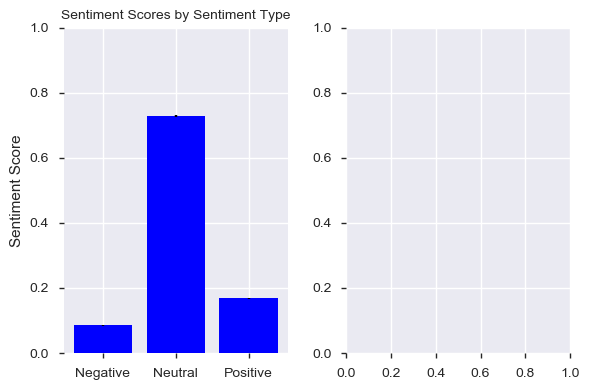

In [166]:
with plt.style.context('seaborn-notebook'):
    
    fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(6,4))
    
    from scipy.stats import sem
    y_bars1 = np.mean(df_sents[['neg','neu','pos']])
    y_errbars1 = sem(df_sents[['neg','neu','pos']])
    
    ax[0].set_ylim([0,1])
    ax[0].set_ylabel('Sentiment Score')
    ax[0].set_title('Sentiment Scores by Sentiment Type',fontsize=10)
    ax[0].bar(x=['Negative','Neutral','Positive'],height=y_bars1, color='blue',yerr=y_errbars1)
    
    
    
    
    plt.tight_layout()


In [155]:
print("RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:\n",'-'*60)
# Normalized % of troll sentiment classes
plot_sent_class = df['sentiment_class'].value_counts()
plot_sent_class_norm = plot_sent_class/(sum(plot_sent_class))
print('\tNormalized Troll Classes:\n',plot_sent_class_norm)

RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:
 ------------------------------------------------------------
	Normalized Troll Classes:
 pos    0.694741
neg    0.305259
Name: sentiment_class, dtype: float64
